In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Definir el modelo
items = ['Materiales', 'Mano de obra', 'Transporte', 'Otros']
costo_unitario = [50, 100, 30, 20]  
cantidad = [100, 50, 70, 40]  

df_costos = pd.DataFrame({'Ítem': items, 'Costo Unitario': costo_unitario, 'Cantidad': cantidad})
df_costos['Costo Total'] = df_costos['Costo Unitario'] * df_costos['Cantidad']


In [ ]:
#Definir distribuciones de probabilidad
num_simulaciones = 5000
np.random.seed(42)  

costo_materiales = np.random.normal(loc=50, scale=5, size=num_simulaciones)
costo_mano_obra = np.random.triangular(left=90, mode=100, right=110, size=num_simulaciones)
costo_transporte = np.random.normal(loc=30, scale=3, size=num_simulaciones)
costo_otros = np.random.uniform(low=15, high=25, size=num_simulaciones)

cantidad_materiales = np.random.normal(loc=100, scale=10, size=num_simulaciones)
cantidad_mano_obra = np.random.triangular(left=40, mode=50, right=60, size=num_simulaciones)
cantidad_transporte = np.random.normal(loc=70, scale=7, size=num_simulaciones)
cantidad_otros = np.random.uniform(low=30, high=50, size=num_simulaciones)

In [ ]:
#Simulación
costo_total_simulacion = (
    costo_materiales * cantidad_materiales +
    costo_mano_obra * cantidad_mano_obra +
    costo_transporte * cantidad_transporte +
    costo_otros * cantidad_otros
)

In [ ]:
#Totales
media = np.mean(costo_total_simulacion)
desviacion = np.std(costo_total_simulacion)
percentiles = np.percentile(costo_total_simulacion, [5, 50, 95])

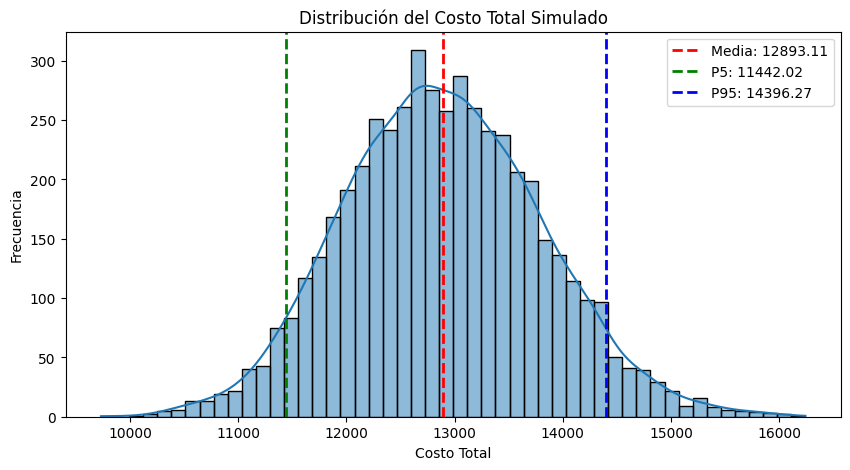

In [ ]:
#Visualización
plt.figure(figsize=(10, 5))
sns.histplot(costo_total_simulacion, bins=50, kde=True)
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(percentiles[0], color='g', linestyle='dashed', linewidth=2, label=f'P5: {percentiles[0]:.2f}')
plt.axvline(percentiles[2], color='b', linestyle='dashed', linewidth=2, label=f'P95: {percentiles[2]:.2f}')
plt.legend()
plt.title('Distribución del Costo Total Simulado')
plt.xlabel('Costo Total')
plt.ylabel('Frecuencia')
plt.show()

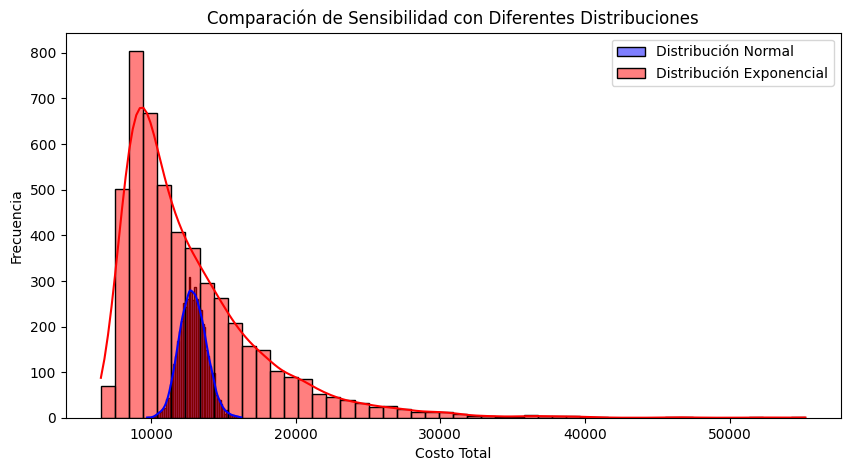

In [ ]:
#Análisis de sensibilidad con diferentes distribuciones
costo_materiales_alt = np.random.exponential(scale=50, size=num_simulaciones)
costo_total_simulacion_alt = (
    costo_materiales_alt * cantidad_materiales +
    costo_mano_obra * cantidad_mano_obra +
    costo_transporte * cantidad_transporte +
    costo_otros * cantidad_otros
)

plt.figure(figsize=(10, 5))
sns.histplot(costo_total_simulacion, bins=50, kde=True, color='blue', label='Distribución Normal')
sns.histplot(costo_total_simulacion_alt, bins=50, kde=True, color='red', label='Distribución Exponencial')
plt.legend()
plt.title('Comparación de Sensibilidad con Diferentes Distribuciones')
plt.xlabel('Costo Total')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Resultados
print(f'Media del costo total: {media:.2f}')
print(f'Desviación estándar: {desviacion:.2f}')
print(f'Percentil 5%: {percentiles[0]:.2f}')
print(f'Percentil 50% (Mediana): {percentiles[1]:.2f}')
print(f'Percentil 95%: {percentiles[2]:.2f}')


Media del costo total: 12893.11
Desviación estándar: 910.97
Percentil 5%: 11442.02
Percentil 50% (Mediana): 12864.97
Percentil 95%: 14396.27




# Conclusiones finales:

1. Costo total esperado
   - La media del costo total es $12,893.11, lo que nos da una buena estimación del presupuesto esperado bajo la simulación.

2. Variabilidad en los costos 
   - La desviación estándar es $910.97, indicando que la mayoría de los escenarios se encuentran dentro de un rango de aproximadamente ±$911 alrededor de la media.

3. Análisis de riesgo  
   - El percentil 5% es $11,442.02, lo que significa que en el 5% de los escenarios más baratos, el costo total es menor a este valor.  
   - El percentil 95% es $14,396.27, lo que indica que en el 5% de los casos más costosos, el presupuesto supera este umbral.  

4. Toma de decisiones  
   - Si la empresa tiene un presupuesto máximo de $12,900, entonces hay un riesgo significativo de excederlo ya que el percentil 50% está cerca de este valor y el percentil 95% lo supera ampliamente.  
   - Se recomiendaría considerar un margen de seguridad en el presupuesto tomando en cuenta el percentil 95% para evitar problemas financieros.  
